In [8]:
from Bio.PDB import PDBParser
import numpy as np

def preprocess_pdb(file_path, distance_threshold=8.0):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure("protein", file_path)

    atoms = [atom for atom in structure.get_atoms()]
    num_atoms = len(atoms)
    
    # Initialize matrices
    coordinates = np.zeros((num_atoms, 3))
    atom_types = []
    adjacency_matrix = np.zeros((num_atoms, num_atoms))

    for i, atom in enumerate(atoms):
        coordinates[i] = atom.coord
        atom_types.append(atom.element)
    
    # Compute adjacency matrix based on distance threshold
    for i in range(num_atoms):
        for j in range(i + 1, num_atoms):
            distance = np.linalg.norm(coordinates[i] - coordinates[j])
            if distance < distance_threshold:
                adjacency_matrix[i][j] = adjacency_matrix[j][i] = 1

    return coordinates, atom_types, adjacency_matrix

# Use the function on your file
file_path = "5b6g.pdb"
coordinates, atom_types, adjacency_matrix = preprocess_pdb(file_path)

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def display_adjacency_matrix(adjacency_matrix):
    print("Adjacency Matrix:")
    print(adjacency_matrix)
    
    # Visualize as a heatmap
    plt.figure(figsize=(8, 8))
    plt.imshow(adjacency_matrix, cmap='Blues', interpolation='none')
    plt.colorbar()
    plt.title("Adjacency Matrix Heatmap")
    plt.xlabel("Atoms")
    plt.ylabel("Atoms")
    plt.show()

In [10]:
def display_atom_data(coordinates, atom_types):
    print("Atom Coordinates and Types:")
    for i, (coord, atom_type) in enumerate(zip(coordinates, atom_types)):
        print(f"Atom {i + 1} - Type: {atom_type}, Coordinates: {coord}")

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

def plot_3d_coordinates(coordinates, atom_types):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Unique colors for each atom type
    unique_types = list(set(atom_types))
    colors = plt.cm.jet(np.linspace(0, 1, len(unique_types)))
    color_map = {atype: colors[i] for i, atype in enumerate(unique_types)}
    
    # Gather data for plotting
    xs, ys, zs, color_values = [], [], [], []
    for coord, atom_type in zip(coordinates, atom_types):
        xs.append(coord[0])
        ys.append(coord[1])
        zs.append(coord[2])
        color_values.append(color_map[atom_type])  # Add color for each atom type
    
    # Plot all points at once, with their color values
    ax.scatter(xs, ys, zs, c=color_values)

    # Unique legend entries for each atom type
    handles = [plt.Line2D([0], [0], marker='o', color=color_map[atype], linestyle='', markersize=6) 
               for atype in unique_types]
    ax.legend(handles, unique_types, title="Atom Types", loc="upper right")
    
    ax.set_title("3D Scatter Plot of Atom Coordinates")
    ax.set_xlabel("X Coordinate")
    ax.set_ylabel("Y Coordinate")
    ax.set_zlabel("Z Coordinate")
    plt.show()

Atom Coordinates and Types:
Atom 1 - Type: N, Coordinates: [  7.1960001   40.49200058 115.20800018]
Atom 2 - Type: C, Coordinates: [  7.78299999  39.25       115.79799652]
Atom 3 - Type: C, Coordinates: [  7.69700003  39.14300156 117.31900024]
Atom 4 - Type: O, Coordinates: [  7.89900017  38.05599976 117.83300018]
Atom 5 - Type: C, Coordinates: [  9.24699974  39.05899811 115.36699677]
Atom 6 - Type: C, Coordinates: [  9.43700027  38.87400055 113.88999939]
Atom 7 - Type: N, Coordinates: [  8.43299961  38.4469986  113.04299927]
Atom 8 - Type: C, Coordinates: [ 10.53800011  39.03099823 113.11599731]
Atom 9 - Type: C, Coordinates: [  8.90100002  38.37200165 111.80999756]
Atom 10 - Type: N, Coordinates: [ 10.17700005  38.71699905 111.82700348]
Atom 11 - Type: N, Coordinates: [  7.43599987  40.22800064 118.04699707]
Atom 12 - Type: C, Coordinates: [  7.1789999   40.08499908 119.49900055]
Atom 13 - Type: C, Coordinates: [  5.73600006  39.66799927 119.84400177]
Atom 14 - Type: O, Coordinates: 

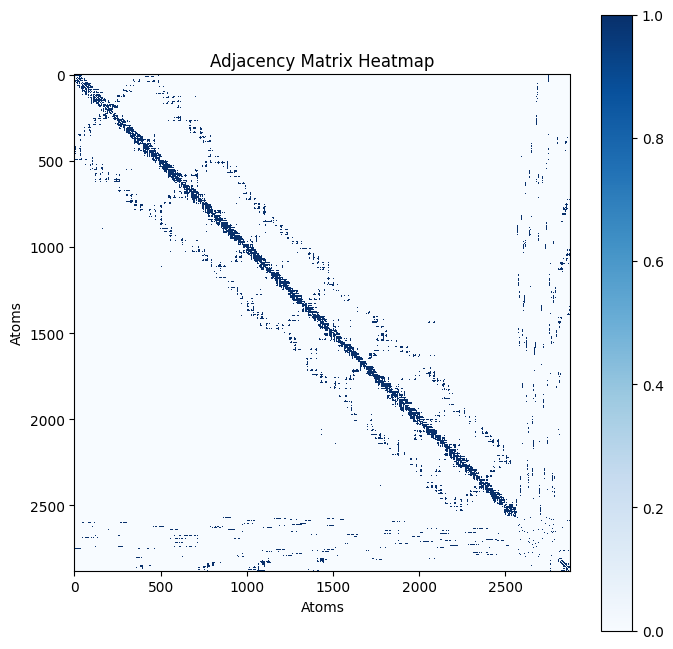

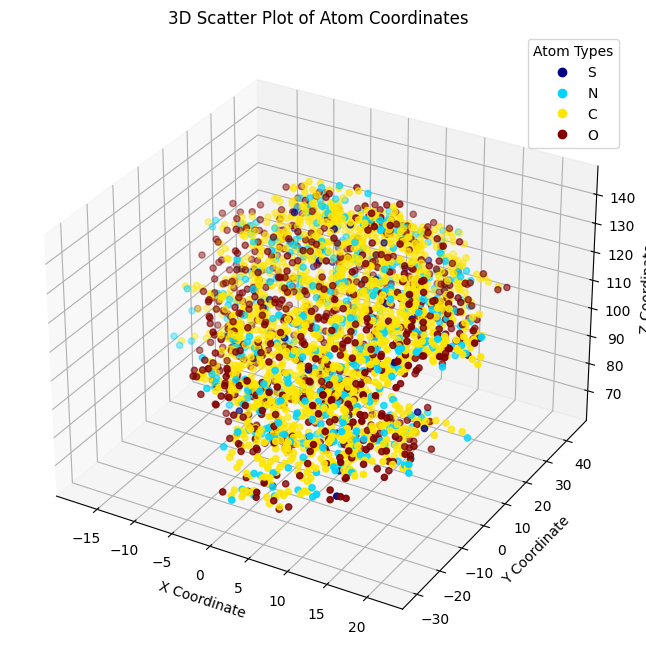

In [12]:
# Assuming you've run the preprocessing code
coordinates, atom_types, adjacency_matrix = preprocess_pdb(file_path)

# Display atom coordinates and types
display_atom_data(coordinates, atom_types)

# Display adjacency matrix
display_adjacency_matrix(adjacency_matrix)

# Plot 3D coordinates
plot_3d_coordinates(coordinates, atom_types)

In [13]:
import numpy as np

def normalize_adjacency(adjacency_matrix):
    degrees = np.sum(adjacency_matrix, axis=1)
    degree_matrix = np.diag(1.0 / np.sqrt(degrees))
    normalized_adjacency = degree_matrix @ adjacency_matrix @ degree_matrix
    return normalized_adjacency

In [14]:
import numpy as np

def normalize_adjacency(adjacency_matrix):
    # Compute the degree matrix
    degrees = np.sum(adjacency_matrix, axis=1)  # Sum of each row gives node degrees
    degree_matrix = np.diag(1.0 / np.sqrt(degrees + 1e-10))  # Add a small value to prevent division by zero
    
    # Apply normalization: D^(-1/2) * A * D^(-1/2)
    normalized_adjacency = degree_matrix @ adjacency_matrix @ degree_matrix
    return normalized_adjacency

# Example usage
# adjacency_matrix is your input adjacency matrix
normalized_adjacency_matrix = normalize_adjacency(adjacency_matrix)
print("Normalized Adjacency Matrix:")
print(normalized_adjacency_matrix)

Normalized Adjacency Matrix:
[[0.         0.01957401 0.01974496 ... 0.         0.         0.        ]
 [0.01957401 0.         0.01739196 ... 0.         0.         0.        ]
 [0.01974496 0.01739196 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
